<a href="https://colab.research.google.com/github/SVT23/Text-Mining-and-Language-/blob/main/TM_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic modeling
"Topic models are algorithms for discovering the main themes that
pervade a large and otherwise unstructured collection of documents.
Topic models can organize the collection according to the discovered themes." 

"The goal of topic modeling is to automatically discover the topics
from a collection of documents."

* For more details see the article http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf  


This notebook shows how to perform topic modeling with LDA with the newsgroup data from scikit-learn

CODE from 
* https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html 
* and slightly https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/ 

In [ ]:
import pandas as pd
import numpy as np 
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# dataset 
see more at:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html 

In [ ]:
# Load Dataset
from sklearn.datasets import fetch_20newsgroups

# Load some categories from the training set
categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(
    subset="train", categories=categories, shuffle=True, random_state=42
)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))


Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
2034 documents
4 categories


#vectorize the data

In [ ]:
# Vectorize document using TF-IDF
n_features = 5000
tfidf_vectorizer = TfidfVectorizer(lowercase=True,
                            ngram_range = (1,1),
                            max_df=0.95, min_df=2, 
                            max_features=n_features, 
                            stop_words="english"
)

# Fit and Transform the documents
X = tfidf_vectorizer.fit_transform(dataset.data)  

# get the actual words from the vectorized data
tf_feature_names = tfidf_vectorizer.get_feature_names_out()

print("n_samples: %d, n_features: %d" % X.shape)

n_samples: 2034, n_features: 5000


#perform LDA
LDA is a probabilistic, generative model for a set of documents. Given the number of topics, it returns the topics based on the documents and the words in each topic.
More details including the method and notation for LDA (which we will not cover) in http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf 

In [ ]:
# Define the number of TOPICS or components
num_components=4

# Create LDA object
ldamodel=LatentDirichletAllocation(n_components=num_components)

# Fit and Transform model on data that has already been vectorized
lda_matrix = ldamodel.fit_transform(X)

# Get Components from the lda model
# components_[i, j] can be viewed as pseudocount that represents the number of 
# times word j was assigned to topic i. from scikit-learn
lda_components=ldamodel.components_

In [ ]:
# view the topic models
n_top_words = 10 # how many words per topic

for i, topic in enumerate(lda_components):
    # numpy argsort: Returns the indices that would sort an array
    # we want the last n_top_words indices, as they have the highest counts 
    
    top_features_index = topic.argsort() [  :-n_top_words - 1 : -1 ]

    # based on indices, get the words, from the vectorizer features
    top_features = [tf_feature_names[i] for i in top_features_index]
    print('topic', i, top_features)

topic 0 ['dseg', 'cruel', 'compaq', 'pyron', 'nicho', 'wpd', 'solntze', 'skndiv', 'prism', 'edm']
topic 1 ['edu', 'god', 'com', 'people', 'keith', 'writes', 'don', 'sandvik', 'article', 'jesus']
topic 2 ['space', 'edu', 'nasa', 'com', 'gov', 'access', 'henry', 'article', 'alaska', 'toronto']
topic 3 ['graphics', 'files', 'edu', 'file', 'image', 'ac', 'thanks', 'polygon', 'color', 'university']


In [ ]:
# another way from https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/
# Print the topics with their terms
for index, topic in enumerate(lda_components):
    zipped = zip(tf_feature_names, topic)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['dseg', 'cruel', 'compaq', 'pyron', 'nicho', 'wpd', 'solntze', 'skndiv', 'prism', 'edm']
Topic 1:  ['edu', 'god', 'com', 'people', 'keith', 'writes', 'don', 'sandvik', 'article', 'jesus']
Topic 2:  ['space', 'edu', 'nasa', 'com', 'gov', 'access', 'henry', 'article', 'alaska', 'toronto']
Topic 3:  ['graphics', 'files', 'edu', 'file', 'image', 'ac', 'thanks', 'polygon', 'color', 'university']


# plots of the topics and words

In [ ]:
# taken from 
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 4, figsize=(15, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.6)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=10)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

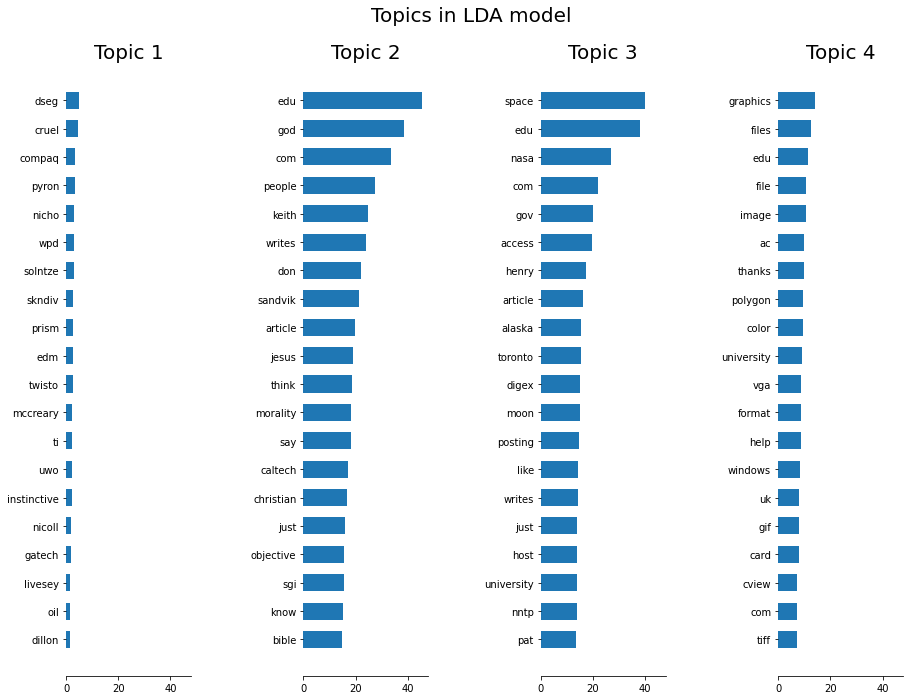

In [ ]:
import matplotlib.pyplot as plt
n_top_words = 20
plot_top_words(ldamodel, tf_feature_names, n_top_words, "Topics in LDA model")